# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-06-01

# 1. 기초 설정

## 사용 라이브러리

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 기타 설정

In [2]:
# 데이터 프레임 열 전부 표시
pd.set_option('display.max_columns', None)

# 2. 전처리 및 EDA

## A. 데이터 확인

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
train.head()

,시군구,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg),연평균_강수량,측정값(총대장균군)
0,강릉시,582247.333333,335607.333333,246640.0,675.0685,233.595067,6.995625,21.057476,4.027363,11.899533,133.283333,8831.898734
1,고성군,921266.500000,513368.500000,407898.0,1489.3125,563.575175,7.799428,21.060081,4.129354,11.371300,148.083333,9176.044776
2,동해시,238565.000000,206953.000000,31612.0,226.6400,33.750000,1.630805,10.951279,1.414709,9.500136,119.708333,719.250000
3,삼척시,974748.500000,460192.500000,514556.0,1157.2950,256.518300,5.677880,24.945085,2.636115,11.860218,132.000000,3374.892857
4,속초시,455394.500000,224794.500000,230600.0,411.2500,127.052450,5.296649,16.721147,2.777307,8.460465,148.083333,2567.625000


In [5]:
test.head()

,시군구,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg),연평균_강수량,측정값(총대장균군)
0,강릉시,5.885358e+05,336963.000000,251572.79,1394.0600,385.532613,11.625277,43.827415,6.330546,23.250838,151.075000,3447.710843
1,고성군,1.228355e+06,684491.333333,543864.00,2394.0800,859.571027,12.092960,33.961476,6.750470,19.088488,173.816667,2983.030303
2,동해시,2.385650e+05,206953.000000,31612.00,1080.3320,267.240776,12.913114,52.201804,11.202011,45.284597,110.200000,1904.028571
3,삼척시,9.747485e+05,460192.500000,514556.00,992.4725,300.522001,6.631652,21.656875,3.087333,10.183989,128.825000,1078.357143
4,속초시,4.553945e+05,224794.500000,230600.00,534.6900,139.085350,5.735455,21.184061,2.961786,10.304701,173.816667,381.916667


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군구                30 non-null     object 
 1   면적총계(m2)           30 non-null     float64
 2   농약사용면적(m2)         30 non-null     float64
 3   농약미사용면적(m2)        30 non-null     float64
 4   총사용량_실물량(kg)       30 non-null     float64
 5   총사용량_성분량(kg)       30 non-null     float64
 6   농약사용_ha_성분량(kg)    30 non-null     float64
 7   농약사용_ha_실물량(kg)    30 non-null     float64
 8   전체면적대비_ha_성분량(kg)  30 non-null     float64
 9   전체면적대비_ha_실물량(kg)  30 non-null     float64
 10  연평균_강수량            30 non-null     float64
 11  측정값(총대장균군)         30 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.9+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군구                15 non-null     object 
 1   면적총계(m2)           15 non-null     float64
 2   농약사용면적(m2)         15 non-null     float64
 3   농약미사용면적(m2)        15 non-null     float64
 4   총사용량_실물량(kg)       15 non-null     float64
 5   총사용량_성분량(kg)       15 non-null     float64
 6   농약사용_ha_성분량(kg)    15 non-null     float64
 7   농약사용_ha_실물량(kg)    15 non-null     float64
 8   전체면적대비_ha_성분량(kg)  15 non-null     float64
 9   전체면적대비_ha_실물량(kg)  15 non-null     float64
 10  연평균_강수량            15 non-null     float64
 11  측정값(총대장균군)         15 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.5+ KB


## B. 결측치 - 값이 0인 데이터

In [8]:
for index, row in train.iterrows():
    if (row == 0).any():
        print(f"Index: {index}")
        print(row)

Index: 11
시군구                          태백시
면적총계(m2)                751394.5
농약사용면적(m2)              670776.5
농약미사용면적(m2)              80618.0
총사용량_실물량(kg)                 0.0
총사용량_성분량(kg)                 0.0
농약사용_ha_성분량(kg)              0.0
농약사용_ha_실물량(kg)              0.0
전체면적대비_ha_성분량(kg)            0.0
전체면적대비_ha_실물량(kg)            0.0
연평균_강수량               124.108333
측정값(총대장균군)           8604.304348
Name: 11, dtype: object


In [9]:
for index, row in test.iterrows():
    if (row == 0).any():
        print(f"Index: {index}")
        print(row)

In [10]:
train = train[train['시군구']!='태백시']
test = test[test['시군구']!='태백시']

In [11]:
# 시군구 컬럼 제거 (모델 학습에 필요없음)
train = train.drop(columns=['시군구'])
test = test.drop(columns=['시군구'])

## C. 이상치

In [12]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

In [13]:
# list 형식
for col in train.columns:
    GetOutlier(train, col)
print()
for col in test.columns:
    GetOutlier(test, col)

면적총계(m2) 이상치 없음
농약사용면적(m2) 이상치 없음
농약미사용면적(m2) 이상치 없음
총사용량_실물량(kg) 이상치: [2331.0225]
총사용량_성분량(kg) 이상치 없음
농약사용_ha_성분량(kg) 이상치 없음
농약사용_ha_실물량(kg) 이상치: [37.83125 59.     ]
전체면적대비_ha_성분량(kg) 이상치: [9.89]
전체면적대비_ha_실물량(kg) 이상치: [51.6]
연평균_강수량 이상치 없음
측정값(총대장균군) 이상치: [28538.48333333]

면적총계(m2) 이상치 없음
농약사용면적(m2) 이상치 없음
농약미사용면적(m2) 이상치 없음
총사용량_실물량(kg) 이상치 없음
총사용량_성분량(kg) 이상치: [859.57102667]
농약사용_ha_성분량(kg) 이상치 없음
농약사용_ha_실물량(kg) 이상치 없음
전체면적대비_ha_성분량(kg) 이상치: [11.20201102]
전체면적대비_ha_실물량(kg) 이상치: [45.28459749]
연평균_강수량 이상치 없음
측정값(총대장균군) 이상치: [14761.69327731]


In [14]:
# subplot 행렬 차원 계산
target_cols = train.columns #train과 test 컬럼 수는 동일
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  #제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  #가장 가까운 값을 사용하여 열 개수 계산

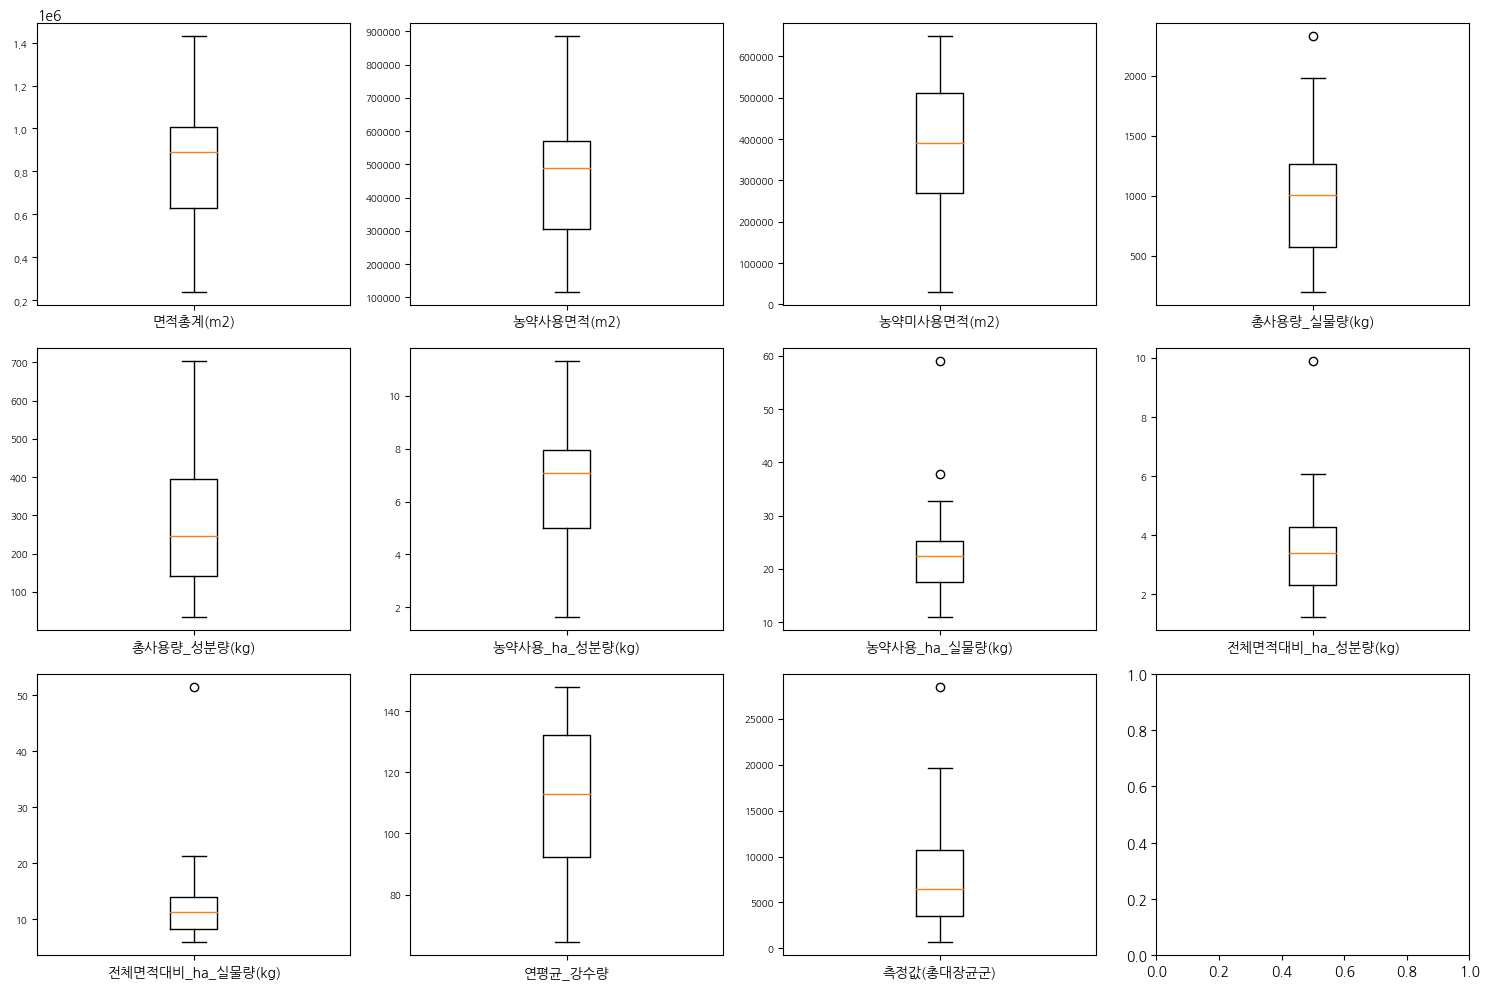

In [15]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(train[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

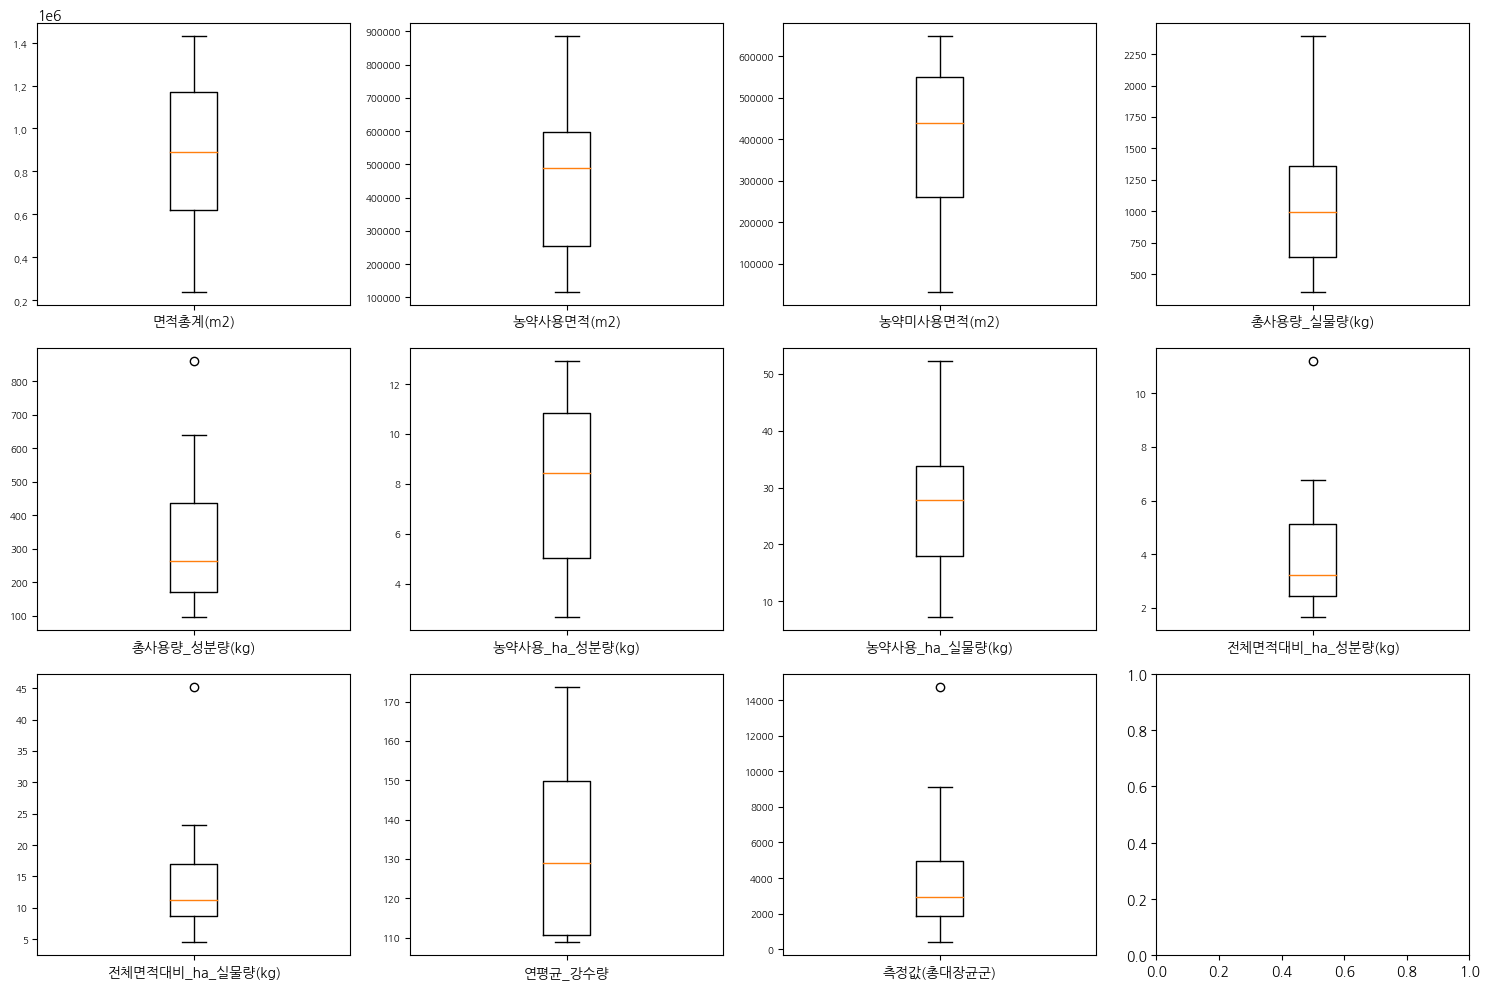

In [16]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(test[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

## D. 분포 확인

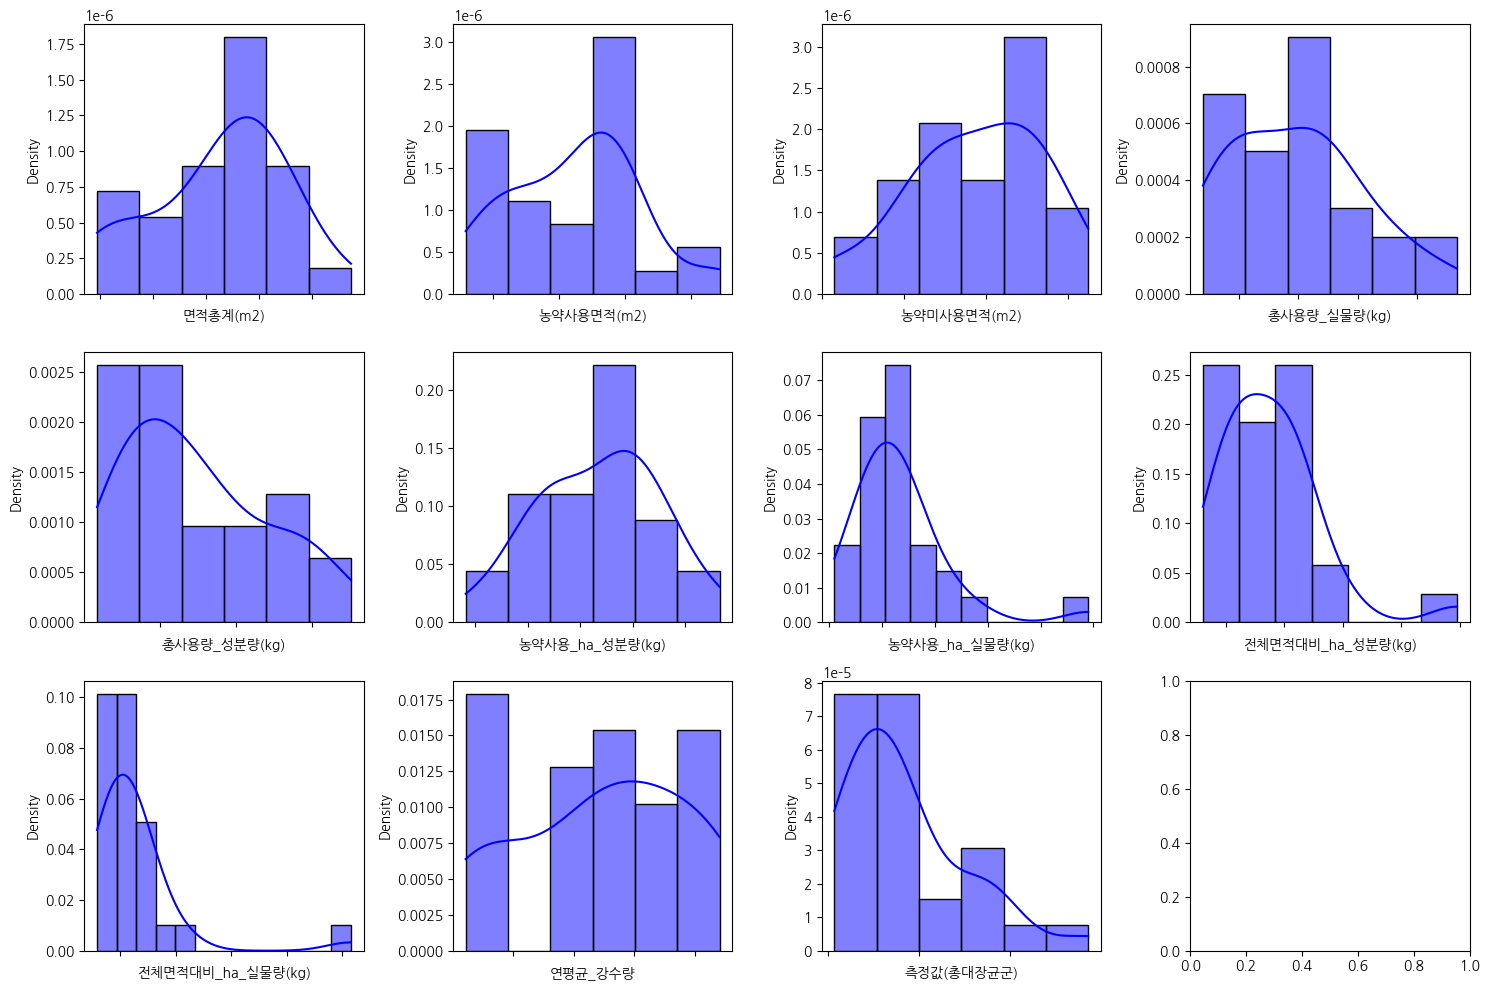

In [17]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(train[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xticklabels('')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

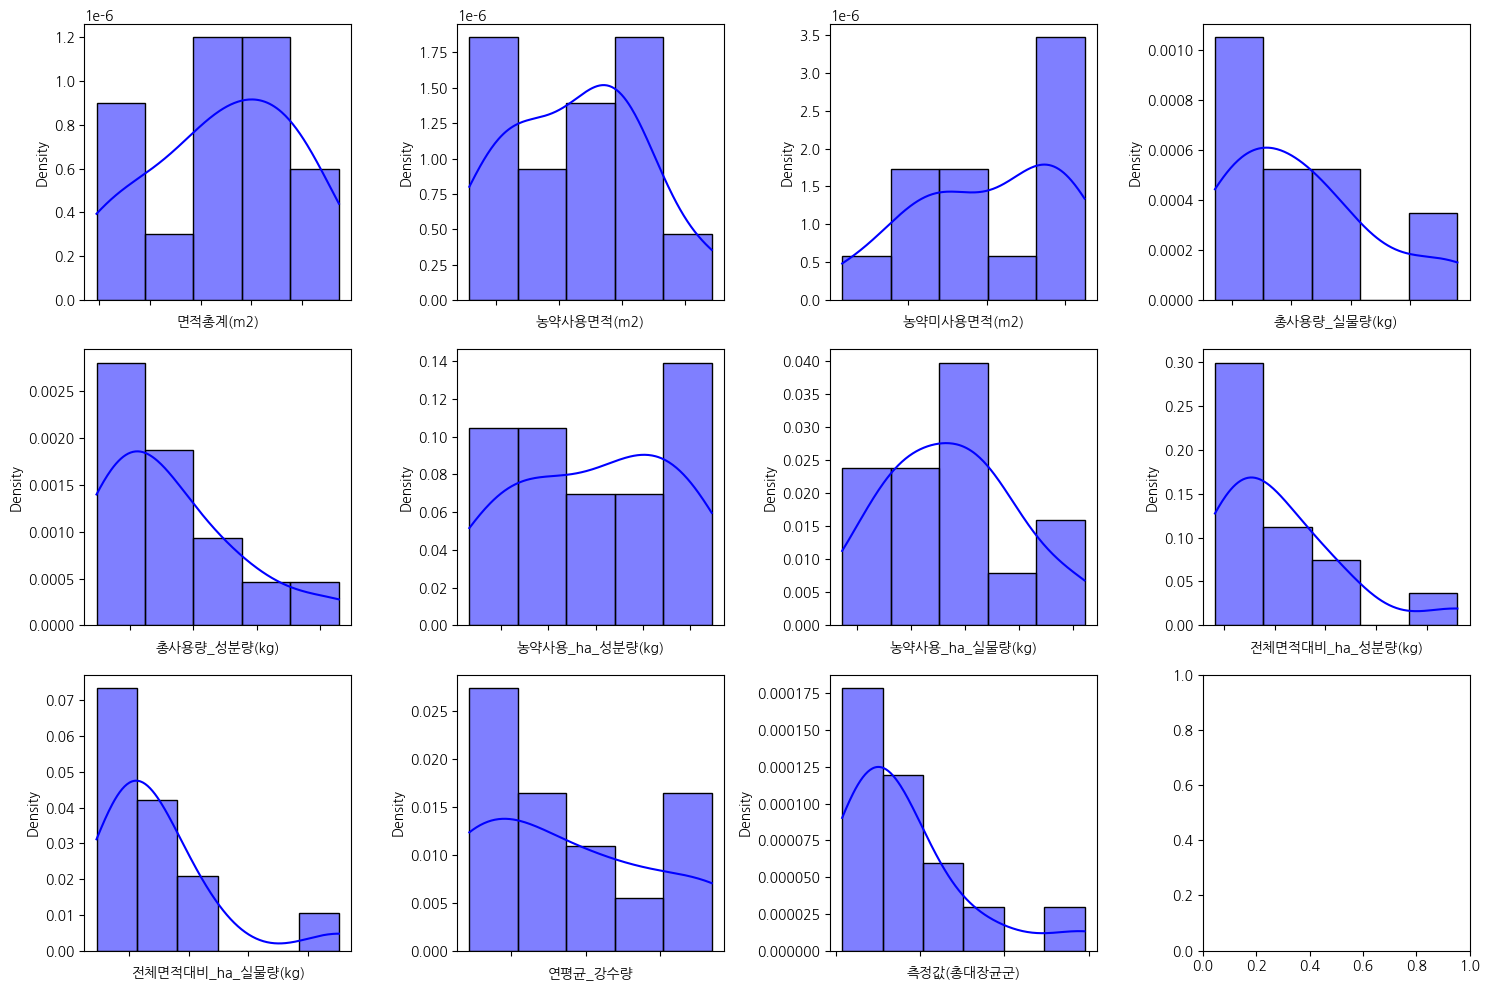

In [18]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(test[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xticklabels('')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [19]:
train_non_norm = []
for column in train.columns:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(train[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print()
    # 정규성을 만족하지 않는 컬럼 저장
    if shapiro_p < 0.05:
        train_non_norm.append(column)

변수 '면적총계(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9502, p-value=0.2002

변수 '농약사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9481, p-value=0.1778

변수 '농약미사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9669, p-value=0.4995

변수 '총사용량_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9548, p-value=0.2612

변수 '총사용량_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9314, p-value=0.0670

변수 '농약사용_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9812, p-value=0.8784

변수 '농약사용_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8063, p-value=0.0001

변수 '전체면적대비_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8614, p-value=0.0016

변수 '전체면적대비_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.5720, p-value=0.0000

변수 '연평균_강수량'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9251, p-value=0.0465

변수 '측정값(총대장균군)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8794, p-value=0.0039



In [20]:
test_non_norm = []
for column in test.columns:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(test[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print()
    # 정규성을 만족하지 않는 컬럼 저장
    if shapiro_p < 0.05:
        test_non_norm.append(column)

변수 '면적총계(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9564, p-value=0.6636

변수 '농약사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9567, p-value=0.6679

변수 '농약미사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9187, p-value=0.2103

변수 '총사용량_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8996, p-value=0.1115

변수 '총사용량_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8893, p-value=0.0791

변수 '농약사용_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9452, p-value=0.4892

변수 '농약사용_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9821, p-value=0.9851

변수 '전체면적대비_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8379, p-value=0.0153

변수 '전체면적대비_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.7534, p-value=0.0014

변수 '연평균_강수량'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8557, p-value=0.0266

변수 '측정값(총대장균군)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.7801, p-value=0.0029



In [21]:
print(train_non_norm)
print(test_non_norm)

['농약사용_ha_실물량(kg)', '전체면적대비_ha_성분량(kg)', '전체면적대비_ha_실물량(kg)', '연평균_강수량', '측정값(총대장균군)']
['전체면적대비_ha_성분량(kg)', '전체면적대비_ha_실물량(kg)', '연평균_강수량', '측정값(총대장균군)']


In [22]:
'''
# 각 컬럼에 대해 로그 변환 수행
for column in train_non_norm:
    # 로그 변환한 값을 새로운 컬럼에 저장
    new_column_name = f"log_{column}"
    train[new_column_name] = np.log1p(train[column])

train.head()
'''

'\n# 각 컬럼에 대해 로그 변환 수행\nfor column in train_non_norm:\n    # 로그 변환한 값을 새로운 컬럼에 저장\n    new_column_name = f"log_{column}"\n    train[new_column_name] = np.log1p(train[column])\n\ntrain.head()\n'

# 3. 모델링

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [24]:
# test에서 예측할 값 제거
X_test = test.drop(columns=['측정값(총대장균군)'])
y_test = test['측정값(총대장균군)']

# 입력 변수(X)와 출력 변수(y) 분리
X_train = train.drop(columns=['측정값(총대장균군)'])
y_train = train['측정값(총대장균군)']

# 데이터 정규화
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
from sklearn.tree import DecisionTreeRegressor

# 평가 데이터 분리
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_part, y_train_part)

# 예측 및 평가
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Validation MSE: {mse}')

Validation MSE: 104784238.2143871


In [26]:
# 테스트 데이터 예측 및 평가
test_predictions = model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)
print(f'Test MSE: {test_mse}')

Test MSE: 78701306.78793682
